# 3.2 Technical Analysis


Technical analysis is a method used by stock traders to analyze and make predictions about the future price movements of stocks, commodities, currencies, or other financial instruments. It involves studying historical market data, such as price and volume, to identify patterns, trends, and signals that can help traders make informed trading decisions.

Below are some key concepts in technical analysis:

* Price Patterns: Technical analysts study various price patterns on charts, such as trend lines, support and resistance levels, chart patterns (e.g., head and shoulders, triangles), and candlestick patterns. These patterns can provide insights into potential future price movements.

* Indicators: Technical analysts use indicators, which are mathematical calculations based on price and volume data, to gain further insights into market trends and potential reversals. Examples of indicators include moving averages, relative strength index (RSI), stochastic oscillator, and MACD (Moving Average Convergence Divergence).

* Volume Analysis: Volume refers to the number of shares or contracts traded in a particular security or market. Technical analysts analyze volume patterns to understand the strength behind price movements. Increasing volume during price advances or declines can indicate a strong trend, while decreasing volume may suggest a weakening trend.

* Support and Resistance: Support levels are price levels at which the stock tends to find buying support, preventing it from falling further. Resistance levels, on the other hand, are price levels where the stock tends to encounter selling pressure, preventing it from rising further. These levels can act as reference points for potential buying or selling opportunities.

* Trend Analysis: Technical analysts identify and analyze trends in price movements. Trends can be upward (bullish), downward (bearish), or sideways (consolidation). They look for higher highs and higher lows in an uptrend, lower highs and lower lows in a downtrend, and sideways price movements in a consolidation phase.

* Risk Management: Technical analysis is not solely focused on predicting price movements but also on managing risk. Traders use techniques such as setting stop-loss orders, determining entry and exit points, and employing proper position sizing to manage risk and protect against potential losses.

# Package: Ta-lib

Ta-Lib is a popular open-source library for technical analysis in Python. It provides a wide range of functions and indicators that traders and analysts can use to perform technical analysis on financial data.

- [Technical Analysis Library in Python](https://github.com/bukosabino/ta)
    - Official document: https://technical-analysis-library-in-python.readthedocs.io/en/latest/
    - Another example: https://github.com/bukosabino/ta/blob/master/examples_to_use/visualize_features.ipynb
- References:
    - https://school.stockcharts.com/doku.php?id=technical_indicators
    - https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/list-of-technical-indicators/
    - https://www.bernstein-bank.com/wp-content/uploads/2016/08/Technical-Analysis-Englisch.pdf

In [1]:
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


params = {'legend.fontsize': 'x-large',
      'figure.figsize': (12, 6),
      'axes.labelsize': 'x-large',
      'axes.titlesize': 'x-large',
      'xtick.labelsize': 'small',
      'ytick.labelsize': 'x-large'}
plt.rcParams.update(params)

%matplotlib inline

In [2]:
# Load MSFT stock data from CSV
ms = pd.read_csv('MSFT.csv', index_col='Date', parse_dates=True)
# Access the Close price column
df = ms[['Close']].copy()
df

,Close
Date,
2020-10-19,214.220001
2020-10-20,214.649994
2020-10-21,214.800003
2020-10-22,214.889999
2020-10-23,216.229996
...,...
2025-10-09,522.400024
2025-10-10,510.959991
2025-10-13,514.049988


### Example 1: Simple Moving Average


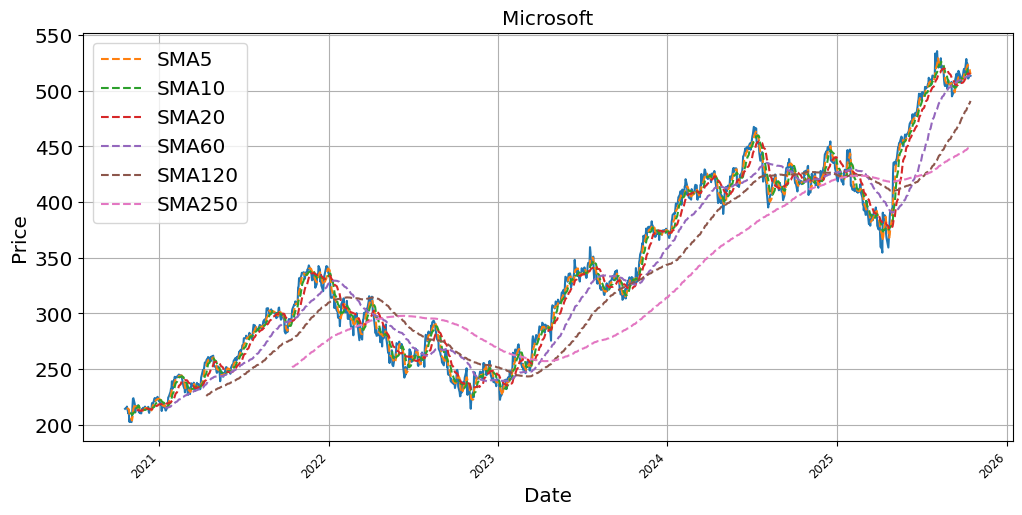

In [3]:
from ta.trend import SMAIndicator

%matplotlib inline

df.loc[:,"SMA5"] = SMAIndicator(df["Close"], window = 5).sma_indicator()
df.loc[:,"SMA10"] = SMAIndicator(df["Close"], window = 10).sma_indicator()
df.loc[:,"SMA20"] = SMAIndicator(df["Close"], window = 20).sma_indicator()
df.loc[:,"SMA60"] = SMAIndicator(df["Close"], window = 60).sma_indicator()
df.loc[:,"SMA120"] = SMAIndicator(df["Close"], window = 120).sma_indicator()
df.loc[:,"SMA250"] = SMAIndicator(df["Close"], window = 250).sma_indicator()

ax = df["Close"].plot.line(figsize = (12, 6), ylabel = "Price")
df.iloc[:, 1:].plot.line(ax=ax, linestyle = "--", grid = True, title = "Microsoft")
plt.xticks(rotation=45, ha='right')
plt.show()


In [4]:
import pandas as pd

# Assuming you have a DataFrame 'df' with a 'close' column and a 'datetime' column

class SMACrossoverStrategy:
    def __init__(self, short_period=10, long_period=20, initial_cash=100_000):
        self.short_period = short_period
        self.long_period = long_period
        self.data = None
        self.short_sma = None
        self.long_sma = None
        self.crossover = False
        self.orders = []
        self.cash = initial_cash
        self.position = 0

    def calculate_signals(self, df):
        self.data = df.copy()  # Create a copy to avoid modifying the original DataFrame
        self.data['short_sma'] = self.data['Close'].rolling(window=self.short_period).mean()
        self.data['long_sma'] = self.data['Close'].rolling(window=self.long_period).mean()
        
        for i in range(self.long_period, len(self.data)):
            if not self.crossover and self.data['short_sma'][i] > self.data['long_sma'][i]:
                self.buy(self.data.index[i+1], self.data['Open'][i+1]) # buy in the following with the Open price
                self.crossover = True
            elif self.crossover and self.data['short_sma'][i] < self.data['long_sma'][i]:
                self.sell(self.data.index[i+1], self.data['Open'][i+1])
                self.crossover = False
        
        # Calculate final position value
        final_value = self.cash + (self.position * self.data['Close'].iloc[-1])
        print(f"Final Cash: {self.cash:.2f}")
        print(f"Final Position Value: {final_value:.2f}")

    def buy(self, date, price):
#         shares_to_buy = self.cash // price
        shares_to_buy = 100
        self.position += shares_to_buy
        self.cash -= shares_to_buy * price
        self.orders.append(f'Buy {shares_to_buy} shares at {price:.2f} on {date}')

    def sell(self, date, price):
        self.cash += self.position * price
        self.position = 0
        self.orders.append(f'Sell all shares at {price:.2f} on {date}')

# Example usage:
# Assuming you have a Pandas DataFrame 'df' with 'close' and 'datetime' columns
strategy = SMACrossoverStrategy(short_period=10, long_period=20, initial_cash=100_000)
strategy.calculate_signals(ms)

# Access the orders generated by the strategy
for order in strategy.orders:
    print(order)

Final Cash: 64696.00
Final Position Value: 116039.00
Buy 100 shares at 216.10 on 2020-11-17 00:00:00
Sell all shares at 214.10 on 2020-11-30 00:00:00
Buy 100 shares at 215.16 on 2020-12-09 00:00:00
Sell all shares at 214.02 on 2021-01-13 00:00:00
Buy 100 shares at 238.00 on 2021-01-27 00:00:00
Sell all shares at 231.53 on 2021-02-26 00:00:00
Buy 100 shares at 231.02 on 2021-03-19 00:00:00
Sell all shares at 249.06 on 2021-05-05 00:00:00
Buy 100 shares at 251.23 on 2021-06-01 00:00:00
Sell all shares at 303.26 on 2021-09-15 00:00:00
Buy 100 shares at 303.57 on 2021-10-18 00:00:00
Sell all shares at 331.99 on 2021-12-03 00:00:00
Buy 100 shares at 335.46 on 2021-12-27 00:00:00
Sell all shares at 343.15 on 2021-12-28 00:00:00
Buy 100 shares at 341.91 on 2021-12-30 00:00:00
Sell all shares at 313.38 on 2022-01-11 00:00:00
Buy 100 shares at 309.87 on 2022-02-09 00:00:00
Sell all shares at 296.36 on 2022-02-17 00:00:00
Buy 100 shares at 300.51 on 2022-03-23 00:00:00
Sell all shares at 282.73 

### Example 2: Bollinger Bands

- John Bollinger started developing Bollinger Bands in the early 1980s.
    - https://www.bollingerbands.com/
    
- Bollinger Bands are a widely used technical analysis tool to assess the volatility and potential price reversals of financial assets like stocks or currency pairs. Bollinger Bands consist of three lines: the middle band and two outer bands. These bands are calculated based on historical price data.

- Trading signals:
    - Bollinger bands often represent strong support lines or resistance lines.
    - Extreme highs and lows outside the bands indicate a possible trend reversal.
    - Narrowing of the ligaments can in turn indicate a possible impending breakout.
    - If the price touches, exceeds or falls below a band several times in succession, a trend acceleration in the existing direction is expected. 

####  1. Calculate the Middle Band (Simple Moving Average)

- Choose a specific time period (e.g., 20 days) for which you want to calculate the Bollinger Bands.

- Calculate the simple moving average (SMA) of the asset's closing prices over this time period using the formula:

- The middle band represents the SMA and serves as the centerline of the Bollinger Bands.

#### 2. Calculate the Standard Deviation

- Compute the standard deviation of the asset's closing prices over the same time period used for the SMA. Use the formula:

#### 3. Calculate the Upper Bollinger Band (Upper Band)

- Upper Band = SMA + (2 * Standard Deviation)

#### 4. Calculate the Lower Bollinger Band (Lower Band)

- Lower Band = SMA - (2 * Standard Deviation)




In [5]:
from ta.volatility import BollingerBands

bb_indicator = BollingerBands(close = df["Close"], window = 20, window_dev = 2)
df["bbm"] = bb_indicator.bollinger_mavg()
df["bbh"] = bb_indicator.bollinger_hband()
df["bbl"] = bb_indicator.bollinger_lband()

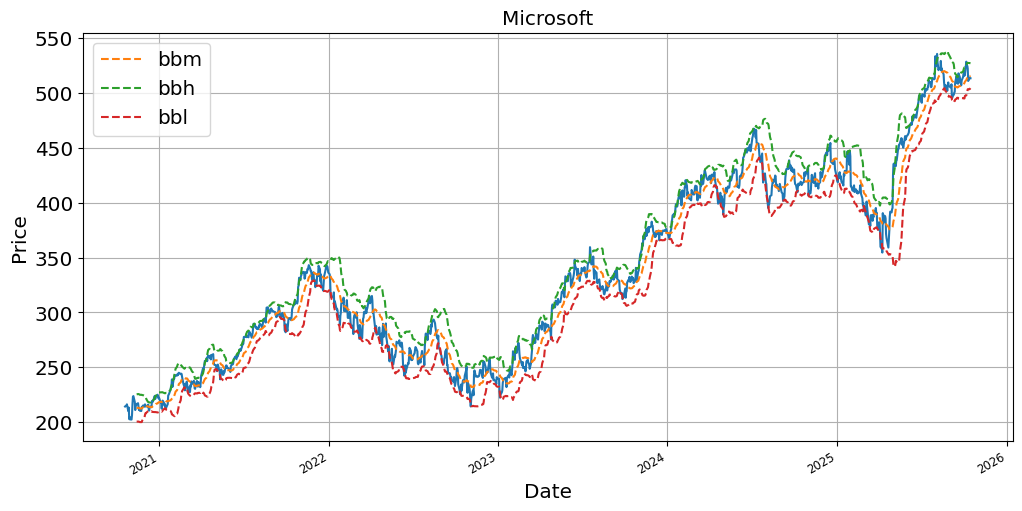

In [6]:
ax = df["Close"].plot.line(figsize = (12, 6), ylabel = "Price")
ax = df[["bbm", "bbh", "bbl"]].plot.line(ax = ax, linestyle = "--", grid = True, title = "Microsoft")

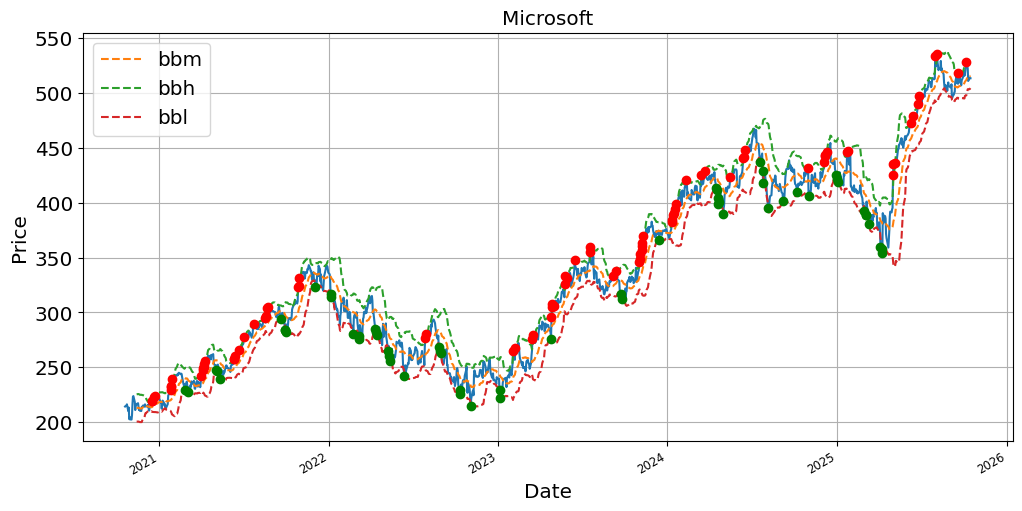

In [7]:
fig, ax = plt.subplots()

ax = df["Close"].plot.line(ax=ax, figsize = (12, 6), ylabel = "Price")
ax = df[["bbm", "bbh", "bbl"]].plot.line(ax = ax, linestyle = "--", grid = True, title = "Microsoft")

bbh_mask = bb_indicator.bollinger_hband_indicator() == 1
bbl_mask = bb_indicator.bollinger_lband_indicator() == 1

plt.plot(df["Close"][bbh_mask], "ro")
plt.plot(df["Close"][bbl_mask], "go")



### Example 3: Relative Strength Index (RSI)
- Wells Wilder (1978).
- Calculation:
    RSI = 100 - 100 / (1 + RS) with RS = Average Gain / Average Loss.
- RSI is more sensitive to price change than KD.
- References:
    - https://www.investopedia.com/terms/r/rsi.asp

#### Example to calculate RSI

Suppose we have a dataset of closing prices for 14 consecutive days:

`[50, 52, 55, 58, 56, 60, 62, 63, 65, 68, 67, 64, 62, 61]`

Let's calculate the Relative Strength (RS) for a 14-day period using the closing prices.

**Step 1: Calculate Daily Price Changes (Gains and Losses)**

- Day 1: 0 (No change)
- Day 2: 52 - 50 = 2 (Gain)
- Day 3: 55 - 52 = 3 (Gain)
- Day 4: 58 - 55 = 3 (Gain)
- Day 5: 56 - 58 = -2 (Loss)
- Day 6: 60 - 56 = 4 (Gain)
- Day 7: 62 - 60 = 2 (Gain)
- Day 8: 63 - 62 = 1 (Gain)
- Day 9: 65 - 63 = 2 (Gain)
- Day 10: 68 - 65 = 3 (Gain)
- Day 11: 67 - 68 = -1 (Loss)
- Day 12: 64 - 67 = -3 (Loss)
- Day 13: 62 - 64 = -2 (Loss)
- Day 14: 61 - 62 = -1 (Loss)

**Step 2: Calculate Average Gain (AG) and Average Loss (AL)**

- Sum of Gains = 2 + 3 + 3 + 4 + 2 + 1 + 2 + 3 = 20
- Sum of Losses = 2 + 1 + 3 + 1 + 2 + 3 = 12
- Number of Periods (N) = 14

   - Average Gain (AG) = Sum of Gains / N = 20 / 14 ≈ 1.43 (rounded to two decimal places)
   - Average Loss (AL) = Sum of Losses / N = 12 / 14 ≈ 0.86 (rounded to two decimal places)

**Step 3: Calculate Relative Strength (RS)**

- RS = AG / AL = 1.43 / 0.86 ≈ 1.66 (rounded to two decimal places)
- RSI = 100 - 100 / (1 + RS) = 100 - 100 / (1 + 1.66) = 62.4

#### Key Concepts and Uses of RSI

1. **Overbought and Oversold Conditions:**
   - *Overbought:* When the RSI rises above a certain threshold (commonly 70), it indicates that the asset may be overbought, potentially leading to a price correction or reversal.
   - *Oversold:* When the RSI falls below a certain threshold (commonly 30), it suggests that the asset may be oversold, possibly leading to a price rebound or reversal. 

2. **Divergence:**
   - RSI divergence occurs when the RSI indicator moves in the opposite direction of the price trend. Bullish divergence happens when the price makes lower lows while the RSI makes higher lows, indicating a potential upward reversal. Bearish divergence occurs when the price makes higher highs while the RSI makes lower highs, suggesting a potential downward reversal.

3. **Confirmation of Trends:**
   - RSI can confirm the strength of an existing trend. In a strong uptrend, the RSI tends to remain above 50, while in a strong downtrend, it typically stays below 50.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator

In [9]:
# Load historical price data
ms = pd.read_csv('MSFT.csv', index_col='Date', parse_dates=True)
# Extract relevant columns
df = ms[['Close', 'Open']].copy()

In [10]:
# Define RSI parameters
window = 14  # RSI calculation window
overbought_threshold = 70  # Threshold for overbought condition
oversold_threshold = 30  # Threshold for oversold condition

In [11]:
# calculate RSI
# df = calculateRSI(df, window)
df.loc[:,"RSI"] = RSIIndicator(df['Close'], window = 14).rsi()

In [12]:
# Create columns for position signals and position
df.loc[:,'Position'] = 0
df.loc[:,'Action'] = 0

In [13]:
position = 0  # Initialize position to 0 (no position)
for index, row in df.iterrows():
    if df.loc[index,'RSI'] <= oversold_threshold and position == 0:  # Buy signal and no position
        position = 1  # Buy the stock
        df.loc[index, 'Action'] = 'Buy'
        print(f'Buy at {index}')
    elif df.loc[index,'RSI'] >= overbought_threshold and position == 1:  # Sell signal and long position
        position = 0  # Sell the stock
        df.loc[index, 'Action'] = 'Sell'
        print(f'Sell at {index}')
    df.loc[index, 'Position'] = position

Buy at 2022-01-25 00:00:00
Sell at 2023-03-17 00:00:00
Buy at 2024-08-02 00:00:00
Sell at 2024-12-17 00:00:00
Buy at 2025-04-04 00:00:00
Sell at 2025-05-02 00:00:00


In [14]:
# Markers for Buy and Sell signals
buy_signals = df[df['Action'] == 'Buy']
sell_signals = df[df['Action'] == 'Sell']

In [15]:
# Calculate daily returns based on positions
df.loc[:,'DailyReturn'] = df['Close'].pct_change() * df['Position'].shift(1)

In [16]:
# Calculate cumulative returns
df.loc[:,'CumulativeReturn'] = (1 + df['DailyReturn']).cumprod() - 1
print(f'The Cumulative Return is {df.iloc[-1].CumulativeReturn}')

The Cumulative Return is 0.30351425663678144


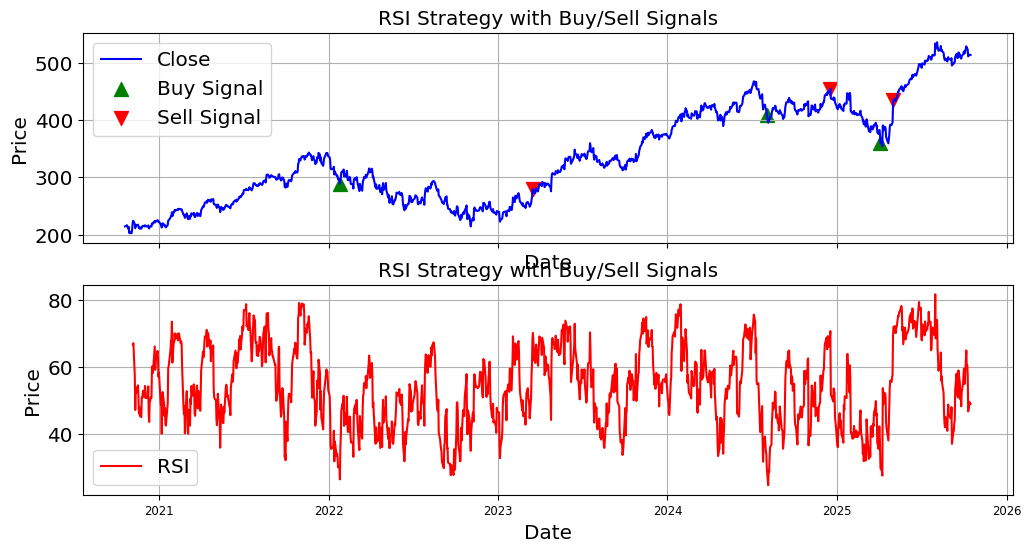

In [17]:
# Create a figure and subplots with a shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.plot(df.index, df['Close'], label='Close', color='blue')

ax1.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', s=100)
ax1.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', s=100)

ax1.set_title('RSI Strategy with Buy/Sell Signals')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)

ax2.plot(df.index, df.RSI, label='RSI', color='red')

ax2.set_title('RSI Strategy with Buy/Sell Signals')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')
ax2.legend()
ax2.grid(True)

### Example 4: Moving Average Convergence Divergence (MACD)

* The Moving Average Convergence Divergence (MACD) is a popular technical indicator used in technical analysis and trading to identify trends and potential trend reversals in financial markets. It consists of multiple components, including the MACD line, the Signal line, and the MACD histogram.


- Gerald Appel (1979).
- Exponential Moving Average (EMA)
    - Let $N$ be the number of observation days and $\alpha = \frac{2}{N + 1}$.
    - Then we have $$\text{EMA}' = \alpha \times \text{close}_i + (1 - \alpha) \times \text{EMA}.$$
    - EMAs reduce the lag **by applying more weight to recent prices**.

<center>
<img src = "./EMA.png" width = "500px"/><br>
Figure: $N = 10$
</center>

- Calculation:
    - MACD Line: 12-day EMA $-$ 26-day EMA.
    - Signal Line: 9-day EMA of MACD Line.
    - MACD Histogram: MACD Line $-$ Signal Line.
- References:
    - https://www.taindicators.com/macd/
    - https://school.stockcharts.com/doku.php?id=technical_indicators:moving_average_convergence_divergence_macd

<video width="900" height="450" src="macd.mp4"  controls></video>

In [18]:
import numpy as np

In [19]:
# Calculate the 12-period and 26-period EMA
short_ema = df['Close'].ewm(span=12, adjust=False).mean()
long_ema = df['Close'].ewm(span=26, adjust=False).mean()

In [20]:
# Calculate the MACD Line
macd_line = short_ema - long_ema

In [21]:
# Calculate the Signal Line (9-period EMA of MACD Line)
signal_line = macd_line.ewm(span=9, adjust=False).mean()

In [22]:
# Calculate the MACD Histogram
macd_histogram = macd_line - signal_line

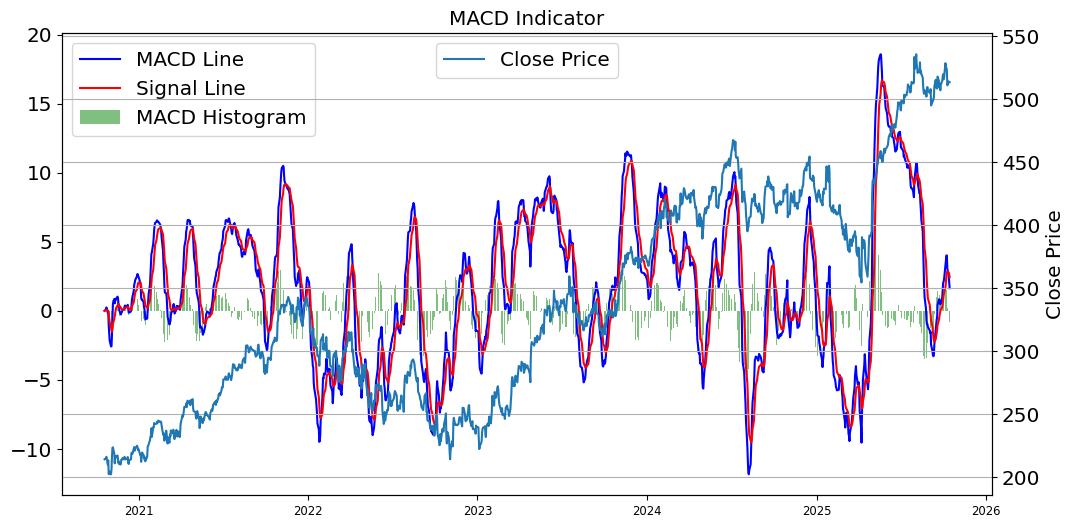

In [23]:
# Plot MACD Line, Signal Line, and MACD Histogram
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df.index, macd_line, label='MACD Line', color='blue')
ax1.plot(df.index, signal_line, label='Signal Line', color='red')
ax1.bar(df.index, macd_histogram, label='MACD Histogram', color='green', alpha=0.5)
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(df.Close, label="Close Price")
ax2.set_ylabel("Close Price")
ax2.legend(loc = "upper center")
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.grid(True)
plt.show()

**Example: Calculate EMA**

In [24]:
short_ema

Date
2020-10-19    214.220001
2020-10-20    214.286154
2020-10-21    214.365208
2020-10-22    214.445945
2020-10-23    214.720414
                 ...    
2025-10-09    519.102582
2025-10-10    517.849876
2025-10-13    517.265278
2025-10-14    516.696774
2025-10-15    516.194193
Name: Close, Length: 1254, dtype: float64

In [25]:
df

,Close,Open,RSI,Position,Action,DailyReturn,CumulativeReturn
Date,,,,,,,
2020-10-19,214.220001,220.419998,NaN,0,0,NaN,NaN
2020-10-20,214.649994,215.800003,NaN,0,0,0.0,0.000000
2020-10-21,214.800003,213.119995,NaN,0,0,0.0,0.000000
2020-10-22,214.889999,213.929993,NaN,0,0,0.0,0.000000
2020-10-23,216.229996,215.029999,NaN,0,0,0.0,0.000000
...,...,...,...,...,...,...,...
2025-10-09,522.400024,522.340027,57.621372,0,0,-0.0,0.303514
2025-10-10,510.959991,519.640015,46.751845,0,0,-0.0,0.303514
2025-10-13,514.049988,516.409973,49.521640,0,0,0.0,0.303514


In [26]:
# short ema
N = 12
k = 2 / (N + 1)
e1 = df.iloc[0].Close
e2 = k * df.iloc[1].Close + (1 - k) * e1
print(e2)

214.28615394005408


* We calculate MACD values using talib.MACD() by providing the 'Close' prices from the DataFrame and specifying the fast period (12), slow period (26), and signal period (9). These parameters correspond to the standard settings for MACD.
We plot the MACD Line, Signal Line, and MACD Histogram using Matplotlib as before.
Using talib makes it convenient to compute MACD values, and it also offers a wide range of other technical indicators for your analysis and trading strategies.


* You can also use ta-lib package to get MACD.

In [27]:
macd = ta.trend.MACD(df['Close'], window_fast=12, window_slow=26, window_sign=9)
macd_v = macd.macd()
macd_signal = macd.macd_signal()
macd_hist = macd.macd_diff()

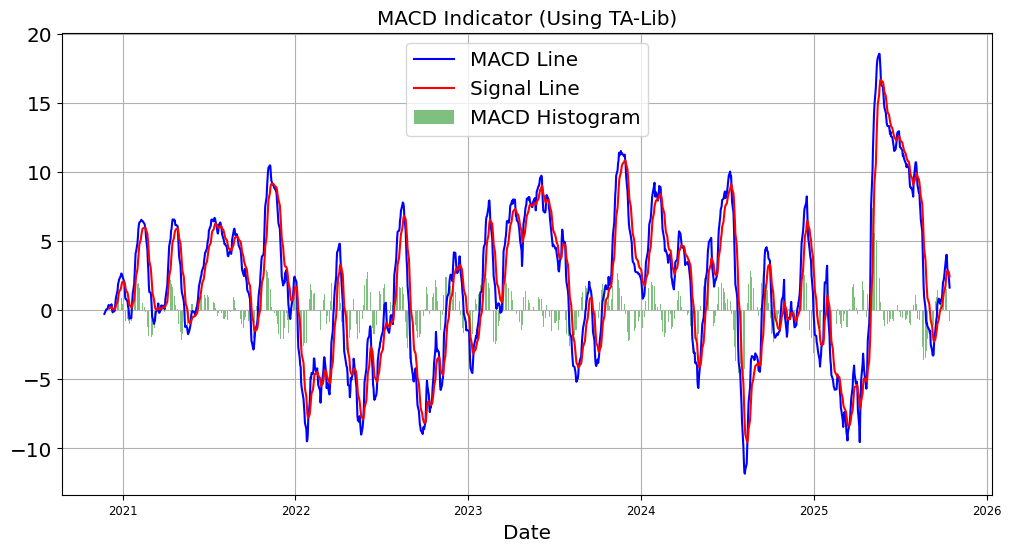

In [28]:
# Plot MACD Line, Signal Line, and MACD Histogram
plt.figure(figsize=(12, 6))

plt.plot(macd_v.index, macd_v, label='MACD Line', color='blue')
plt.plot(macd_signal.index, macd_signal, label='Signal Line', color='red')
plt.bar(macd_hist.index, macd_hist, label='MACD Histogram', color='green', alpha=0.5)

plt.legend()
plt.title('MACD Indicator (Using TA-Lib)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

* MACD provides several signals and insights that can assist traders in their decision-making process. Here's how MACD helps in trading:

* **Trend Identification**: 

`MACD Line and Signal Line Crossovers`: One of the primary uses of MACD is to identify changes in the direction of a trend. When the MACD line crosses above the signal line, it generates a bullish signal, indicating a potential upward trend. Conversely, when the MACD line crosses below the signal line, it generates a bearish signal, suggesting a potential downward trend. Traders can use these crossovers to enter or exit positions.

* **Momentum Confirmation**:

`MACD Histogram`: The MACD histogram represents the difference between the MACD line and the signal line. A rising histogram indicates increasing momentum in the prevailing trend, whether bullish or bearish. Traders often use the MACD histogram to confirm the strength of a trend.

* **Overbought and Oversold Conditions**:

`Divergence`: Divergence occurs when the price of an asset moves in the opposite direction of the MACD indicator. Bullish divergence occurs when the price makes lower lows while the MACD histogram makes higher lows, suggesting a potential reversal from a downtrend to an uptrend. Conversely, bearish divergence occurs when the price makes higher highs while the MACD histogram makes lower highs, signaling a potential reversal from an uptrend to a downtrend.

### Example 5: Stochastic Oscillator (KD)
- George C. Lan (1957).
- The Stochastic Oscillator, often referred to as Stochastics or simply "KD" (short for %K and %D), is a popular **momentum indicator** used in technical analysis to identify overbought and oversold conditions in financial markets. It helps traders and analysts gauge the strength of a trend and potential reversal points. 
- Calculation:
    - Lowest Low = lowest low for the look-back period
    - Highest High = highest high for the look-back period
    - %K = (Current Close - Lowest Low) / (Highest High - Lowest Low) x 100
    - %D = 3-day SMA of %K

- References
    - https://school.stockcharts.com/doku.php?id=technical_indicators:stochastic_oscillator_fast_slow_and_full
    

In [29]:
# Load MSFT stock data from CSV
ms = pd.read_csv('MSFT.csv', index_col='Date', parse_dates=True)

In [30]:
df2 = ms[['High', 'Low', 'Close']]

In [31]:
from ta.momentum import StochasticOscillator

# df2 = ffn.get("2330.tw:High, 2330.tw:Low, 2330.tw:Close", start = "2020-01-01")
# df2.columns = ["High", "Low", "Close"]

In [32]:
df2.loc[:,"K"] = StochasticOscillator(close = df2["Close"], low = df2["Low"], high = df2["High"], window = 14, smooth_window = 3).stoch()
df2.loc[:,"D"] = StochasticOscillator(close = df2["Close"], low = df2["Low"], high = df2["High"], window = 14, smooth_window = 3).stoch_signal()

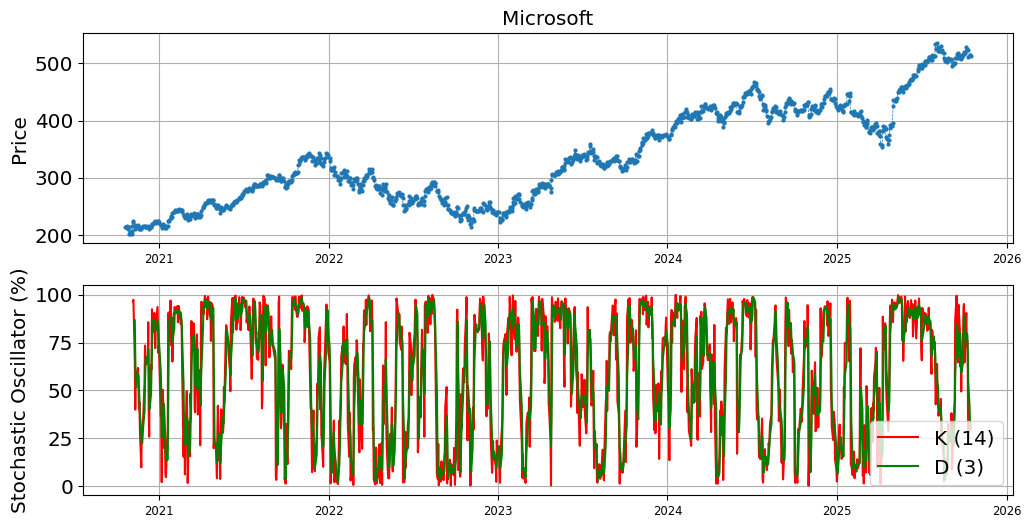

In [33]:
plt.figure(figsize = (12, 6))
plt.subplot(211)
plt.title("Microsoft")

plt.plot(df2.index, df2["Close"], "o", linewidth = 0.5, linestyle = "--", markersize = 2)

plt.grid(True)
plt.ylabel("Price")
l, h = plt.xlim()

plt.subplot(212)

plt.plot(df2.index, df2["K"], color = "r")
plt.plot(df2.index, df2["D"], color = "g")

plt.grid(True)
plt.ylabel("Stochastic Oscillator (%)")
plt.legend(["K (14)", "D (3)"])
plt.xlim(l, h)

plt.show()

The Stochastic Oscillator is a popular technical indicator used in trading to identify overbought and oversold conditions in financial markets. It provides signals that traders use to make trading decisions. Here's how the Stochastic Oscillator helps in trading:

1. **Overbought and Oversold Conditions:**
   - **Overbought:** When the Stochastic Oscillator rises above a certain threshold (commonly 80), it indicates that the asset is potentially overbought, meaning its price may have risen too far, too fast. This suggests a possible reversal or correction in price.
   - **Oversold:** When the Stochastic Oscillator falls below a certain threshold (commonly 20), it indicates that the asset is potentially oversold, meaning its price may have declined too far, too fast. This suggests a possible reversal or bounce in price.
   - Traders often use these overbought and oversold conditions to identify potential entry and exit points. For example, they may consider selling when an asset is overbought and buying when it is oversold.

2. **Trend Identification:**
   - **Crossovers:** The Stochastic Oscillator generates signals based on the crossover of its %K line and %D line. When the %K line crosses above the %D line, it generates a bullish signal, suggesting potential upward momentum. Conversely, when the %K line crosses below the %D line, it generates a bearish signal, suggesting potential downward momentum.
   - **Divergence:** Traders also look for divergence between the price of the asset and the Stochastic Oscillator. Bullish divergence occurs when the price makes lower lows while the Stochastic makes higher lows, indicating a potential upward reversal. Bearish divergence occurs when the price makes higher highs while the Stochastic makes lower highs, indicating a potential downward reversal.

3. **Confirmation with Other Indicators:**
   - Traders often use the Stochastic Oscillator in conjunction with other technical indicators, such as moving averages or trendlines, to confirm their trading decisions. For example, they may only take Stochastic signals that align with the overall trend indicated by a moving average.

---

### Example 6: On-Balance Volume (OBV)

On-Balance Volume (OBV) is a technical trading momentum indicator developed by Joe Granville in 1963. 
It uses volume flow to predict changes in stock price. The theory behind OBV is that volume precedes price movement—when 
smart money starts buying or selling, volume increases before price changes.

#### Mathematical Foundation

The OBV is calculated using a cumulative total of volume:

$$
\text{OBV}_t = \text{OBV}_{t-1} + \begin{cases}
+\text{Volume}_t & \text{if } \text{Close}_t > \text{Close}_{t-1} \\
0 & \text{if } \text{Close}_t = \text{Close}_{t-1} \\
-\text{Volume}_t & \text{if } \text{Close}_t < \text{Close}_{t-1}
\end{cases}
$$

where:
- $\text{OBV}_t$ = On-Balance Volume at time $t$
- $\text{Volume}_t$ = Trading volume at time $t$
- $\text{Close}_t$ = Closing price at time $t$

**Key Concept:** 
- If today's close is higher than yesterday's, add today's volume to OBV
- If today's close is lower than yesterday's, subtract today's volume from OBV
- If today's close equals yesterday's, OBV remains unchanged

#### Interpretation

1. **Trend Confirmation:**
   - Rising OBV confirms an uptrend (buying pressure)
   - Falling OBV confirms a downtrend (selling pressure)

2. **Divergence (Most Powerful Signal):**
   - **Bullish Divergence:** Price makes lower lows, but OBV makes higher lows (potential reversal up)
   - **Bearish Divergence:** Price makes higher highs, but OBV makes lower highs (potential reversal down)

3. **OBV Moving Average Strategy:**
   - Buy when OBV crosses above its moving average (increasing volume momentum)
   - Sell when OBV crosses below its moving average (decreasing volume momentum)

#### References
- https://www.investopedia.com/terms/o/onbalancevolume.asp
- https://school.stockcharts.com/doku.php?id=technical_indicators:on_balance_volume_obv
- Granville, J. (1963). Granville's New Key to Stock Market Profits

In [34]:
from ta.volume import OnBalanceVolumeIndicator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Load MSFT data
df_obv = pd.read_csv('MSFT.csv', index_col='Date', parse_dates=True)
df_obv = df_obv[['Close', 'Volume']].copy()

In [36]:
# Calculate OBV
obv_indicator = OnBalanceVolumeIndicator(close=df_obv['Close'], volume=df_obv['Volume'])
df_obv['OBV'] = obv_indicator.on_balance_volume()

In [37]:
# Calculate OBV moving average (20-day)
df_obv['OBV_MA'] = df_obv['OBV'].rolling(window=20).mean()

In [38]:
# Normalize OBV for better visualization (scale to 0-100)
df_obv['OBV_Normalized'] = (df_obv['OBV'] - df_obv['OBV'].min()) / (df_obv['OBV'].max() - df_obv['OBV'].min()) * 100
df_obv['OBV_MA_Normalized'] = (df_obv['OBV_MA'] - df_obv['OBV'].min()) / (df_obv['OBV'].max() - df_obv['OBV'].min()) * 100

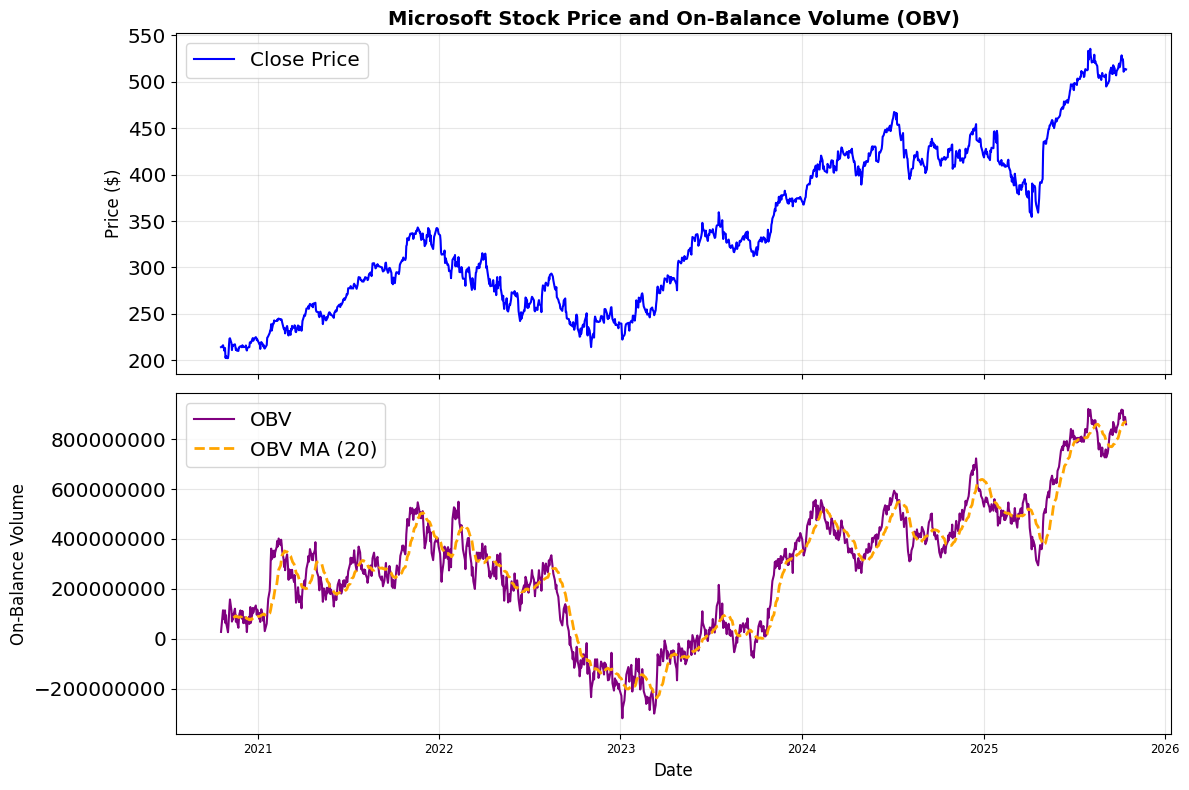


OBV Statistics:
Starting OBV: 27,625,800
Ending OBV: 859,204,300
OBV Change: 3010.15%


In [39]:
# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot price
ax1.plot(df_obv.index, df_obv['Close'], label='Close Price', color='blue', linewidth=1.5)

ax1.set_ylabel('Price ($)', fontsize=12)
ax1.set_title('Microsoft Stock Price and On-Balance Volume (OBV)', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot OBV and its moving average
ax2.plot(df_obv.index, df_obv['OBV'], label='OBV', color='purple', linewidth=1.5)
ax2.plot(df_obv.index, df_obv['OBV_MA'], label='OBV MA (20)', color='orange', linewidth=2, linestyle='--')

ax2.set_ylabel('On-Balance Volume', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.ticklabel_format(style='plain', axis='y')  # Disable scientific notation

plt.tight_layout()
plt.show()

print(f"\nOBV Statistics:")
print(f"Starting OBV: {df_obv['OBV'].iloc[0]:,.0f}")
print(f"Ending OBV: {df_obv['OBV'].iloc[-1]:,.0f}")
print(f"OBV Change: {((df_obv['OBV'].iloc[-1] / df_obv['OBV'].iloc[0]) - 1) * 100:.2f}%")

In [40]:
# OBV Trading Strategy: Buy when OBV crosses above MA, Sell when OBV crosses below MA
df_obv['Position'] = 0
df_obv['Signal'] = ''

position = 0
buy_dates = []
sell_dates = []
buy_prices = []
sell_prices = []

for i in range(20, len(df_obv)):  # Start after MA calculation period
    obv_current = df_obv['OBV'].iloc[i]
    obv_ma = df_obv['OBV_MA'].iloc[i]
    obv_prev = df_obv['OBV'].iloc[i-1]
    obv_ma_prev = df_obv['OBV_MA'].iloc[i-1]
    
    # Buy signal: OBV crosses above its MA (bullish crossover)
    if obv_prev <= obv_ma_prev and obv_current > obv_ma and position == 0:
        position = 1
        df_obv.iloc[i, df_obv.columns.get_loc('Position')] = 1
        df_obv.iloc[i, df_obv.columns.get_loc('Signal')] = 'Buy'
        buy_dates.append(df_obv.index[i])
        buy_prices.append(df_obv['Close'].iloc[i])
        print(f'Buy at {df_obv.index[i].date()}: ${df_obv["Close"].iloc[i]:.2f} (OBV: {obv_current:,.0f}, MA: {obv_ma:,.0f})')
    
    # Sell signal: OBV crosses below its MA (bearish crossover)
    elif obv_prev >= obv_ma_prev and obv_current < obv_ma and position == 1:
        position = 0
        df_obv.iloc[i, df_obv.columns.get_loc('Position')] = 0
        df_obv.iloc[i, df_obv.columns.get_loc('Signal')] = 'Sell'
        sell_dates.append(df_obv.index[i])
        sell_prices.append(df_obv['Close'].iloc[i])
        print(f'Sell at {df_obv.index[i].date()}: ${df_obv["Close"].iloc[i]:.2f} (OBV: {obv_current:,.0f}, MA: {obv_ma:,.0f})')
    else:
        df_obv.iloc[i, df_obv.columns.get_loc('Position')] = position

# Calculate returns
df_obv['Returns'] = df_obv['Close'].pct_change()
df_obv['Strategy_Returns'] = df_obv['Position'].shift(1) * df_obv['Returns']
df_obv['Cumulative_Strategy_Returns'] = (1 + df_obv['Strategy_Returns']).cumprod() - 1
df_obv['Cumulative_Market_Returns'] = (1 + df_obv['Returns']).cumprod() - 1

print(f"\n{'='*60}")
print(f"Total Trades: {len(buy_dates)}")
print(f"Strategy Cumulative Return: {df_obv['Cumulative_Strategy_Returns'].iloc[-1]*100:.2f}%")
print(f"Buy & Hold Return: {df_obv['Cumulative_Market_Returns'].iloc[-1]*100:.2f}%")

# Calculate win rate
if len(buy_prices) > 0 and len(sell_prices) > 0:
    trades = min(len(buy_prices), len(sell_prices))
    wins = sum(1 for i in range(trades) if sell_prices[i] > buy_prices[i])
    win_rate = (wins / trades) * 100
    print(f"Win Rate: {win_rate:.2f}% ({wins}/{trades} winning trades)")

Buy at 2020-11-19: $212.42 (OBV: 92,747,900, MA: 90,819,935)
Sell at 2020-11-20: $210.39 (OBV: 69,904,800, MA: 88,598,410)
Buy at 2020-11-25: $213.87 (OBV: 99,213,900, MA: 86,986,415)
Sell at 2020-11-30: $214.07 (OBV: 80,661,300, MA: 89,137,370)
Buy at 2020-12-01: $216.21 (OBV: 111,565,800, MA: 93,397,405)
Sell at 2020-12-02: $215.37 (OBV: 87,841,300, MA: 95,095,615)
Buy at 2020-12-08: $216.01 (OBV: 86,050,500, MA: 85,088,565)
Sell at 2020-12-09: $211.80 (OBV: 53,609,900, MA: 84,316,020)
Buy at 2020-12-14: $214.20 (OBV: 86,654,400, MA: 79,338,465)
Sell at 2020-12-15: $214.13 (OBV: 59,653,800, MA: 76,297,050)
Buy at 2020-12-16: $219.28 (OBV: 94,677,100, MA: 76,214,505)
Sell at 2020-12-18: $218.59 (OBV: 63,838,000, MA: 77,730,895)
Buy at 2020-12-21: $222.59 (OBV: 101,019,900, MA: 79,286,650)
Sell at 2021-01-04: $217.69 (OBV: 79,553,100, MA: 89,651,850)
Buy at 2021-01-05: $217.90 (OBV: 103,376,100, MA: 90,451,335)
Sell at 2021-01-06: $212.25 (OBV: 67,445,400, MA: 90,685,285)
Buy at 2021-0

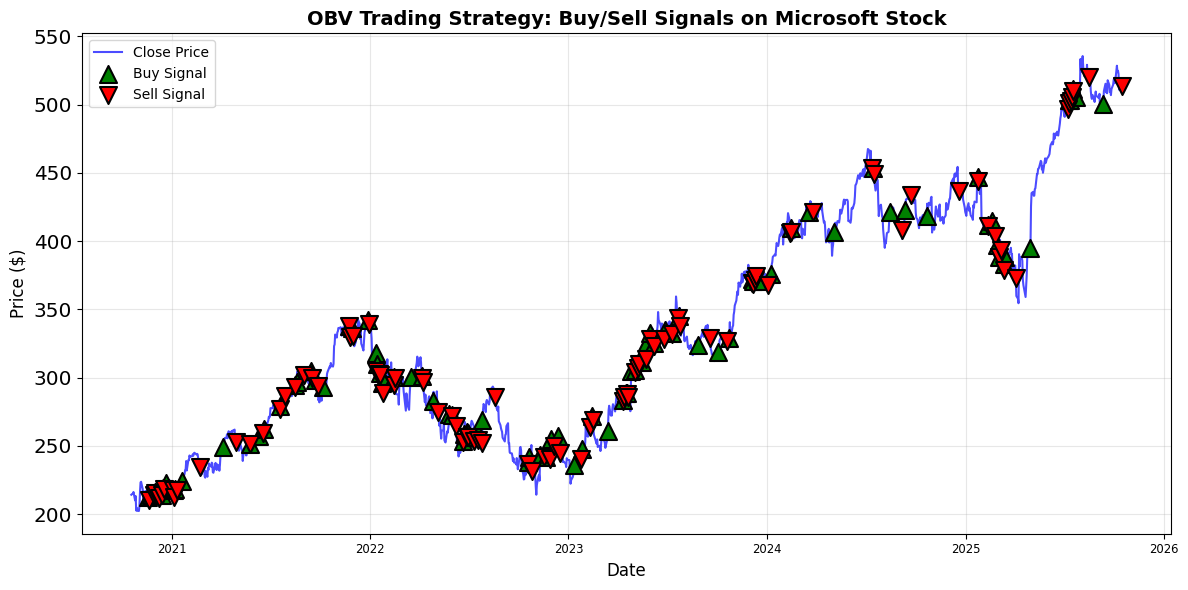

In [41]:
# Plot price chart with buy/sell signals
fig, ax = plt.subplots(figsize=(12, 6))

# Plot price
ax.plot(df_obv.index, df_obv['Close'], label='Close Price', color='blue', linewidth=1.5, alpha=0.7)

# Plot buy signals
buy_signals = df_obv[df_obv['Signal'] == 'Buy']
ax.scatter(buy_signals.index, buy_signals['Close'], color='green', marker='^', s=150, 
           label='Buy Signal', zorder=5, edgecolors='black', linewidth=1.5)

# Plot sell signals
sell_signals = df_obv[df_obv['Signal'] == 'Sell']
ax.scatter(sell_signals.index, sell_signals['Close'], color='red', marker='v', s=150, 
           label='Sell Signal', zorder=5, edgecolors='black', linewidth=1.5)

ax.set_title('OBV Trading Strategy: Buy/Sell Signals on Microsoft Stock', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()